/tmp/ipykernel_75113/490504150.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_to_petal_area_ratio', data=iris_df, palette="Set2")


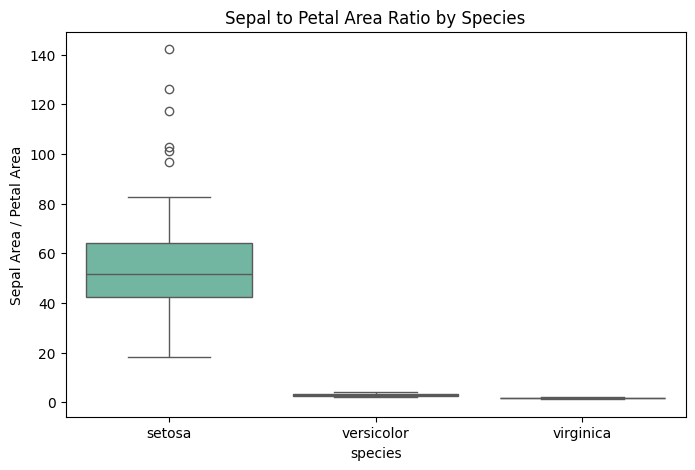

Summary statistics of new feature by species:
            count       mean        std        min        25%        50%  \
species                                                                    
setosa       50.0  56.925120  26.396744  18.229167  42.477941  51.750000   
versicolor   50.0   2.970577   0.478105   1.985294   2.655286   2.970235   
virginica    50.0   1.765114   0.248194   1.261500   1.603754   1.707830   

                  75%         max  
species                            
setosa      64.151786  142.133333  
versicolor   3.296154    4.234286  
virginica    1.928455    2.345312  


In [1]:
# Title: Feature Engineering for Classification
# Description: Create a new feature that could help distinguish between species based on
# logical assumptions and verify its utility.
# Feature Engineering for Classification

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add species column
iris_df['species'] = pd.Series(iris.target).map(dict(enumerate(iris.target_names)))

# Create new feature: sepal area to petal area ratio
iris_df['sepal_area'] = iris_df['sepal length (cm)'] * iris_df['sepal width (cm)']
iris_df['petal_area'] = iris_df['petal length (cm)'] * iris_df['petal width (cm)']
iris_df['sepal_to_petal_area_ratio'] = iris_df['sepal_area'] / iris_df['petal_area']

# Visualize the new feature across species
plt.figure(figsize=(8,5))
sns.boxplot(x='species', y='sepal_to_petal_area_ratio', data=iris_df, palette="Set2")
plt.title('Sepal to Petal Area Ratio by Species')
plt.ylabel('Sepal Area / Petal Area')
plt.show()

# Print basic stats to verify usefulness
print("Summary statistics of new feature by species:")
print(iris_df.groupby('species')['sepal_to_petal_area_ratio'].describe())
